# k-Means(k-평균)

- 대표적인 군집 알고리즘으로 군집의 중심을 찾는 작업
- 클러스터(cluster) : 군집
- 클러스터링(clustring) : 군집화 하는 작업
- k : hyper parameter

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [3]:
# 3차원 데이터를 2차원 데이터로 변경
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

# k-Means Model

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_2d) # 비지도학습이므로 fit에 Target이 없다

KMeans(n_clusters=3, random_state=42)

In [7]:
# 군집화 Label 출력해 보기
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

> 군집화이므로 Target이 뭔지 몰라 숫자값으로 표현됨

In [8]:
# 군집화한 cluster 갯수와 각 cluster의 갯수 확인하기
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


---


In [17]:
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
     n = len(arr) # n은 샘플 갯수
     # 한 줄에 10개씩 이미지 그리기, 샘플 갯수를 10으로 나누어 전체 행 갯수 계산
     rows = int(np.ceil(n/10)) # 올림처리
     # 행이 1개이면 열 갯수가 샘플갯수이고 그렇지 않으면 10개
     cols = n if rows < 2 else 10
     
     fig,axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

     for i in range(rows):
        for j in range(cols):
            if i *10 + j < n: # n개까지만 그린다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
     plt.show()

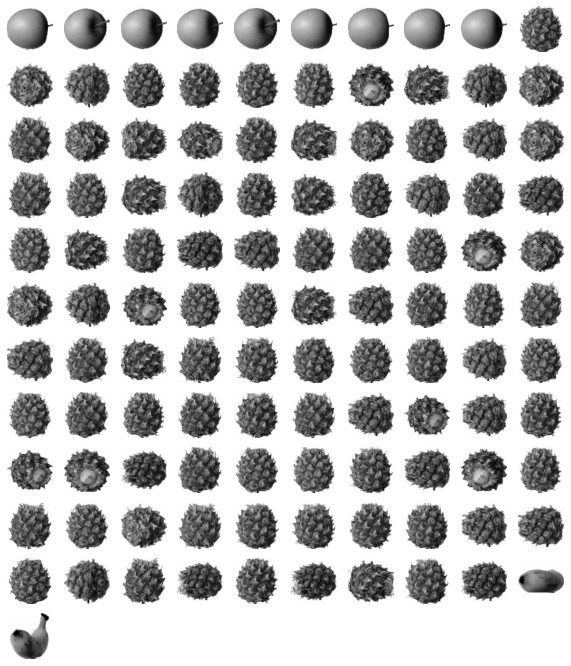

In [18]:
draw_fruits(fruits[km.labels_ == 0])

> 파인애플의 그림 : 0번이 파일애플

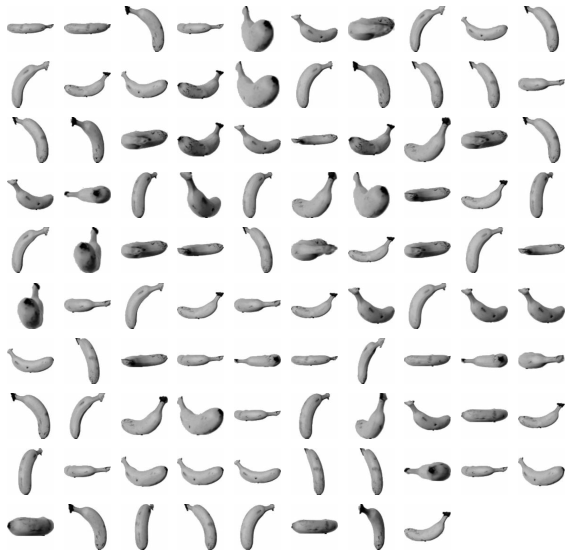

In [19]:
draw_fruits(fruits[km.labels_ == 1])

> Cluster 1번이 바나나이다 

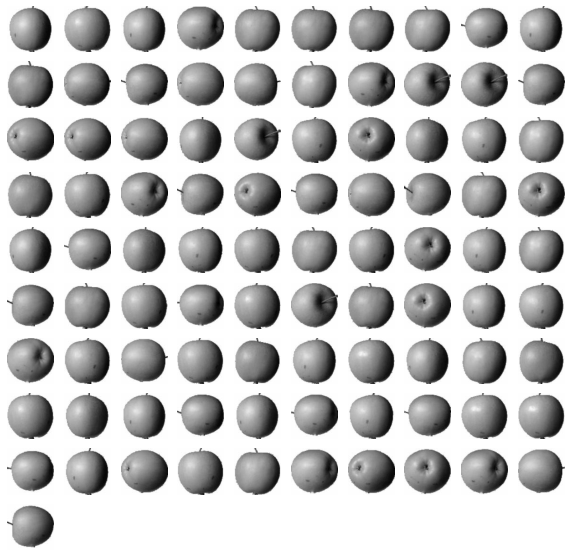

In [20]:
draw_fruits(fruits[km.labels_ == 2])

> Cluster 2번은 사과이다

# cluster의 중심

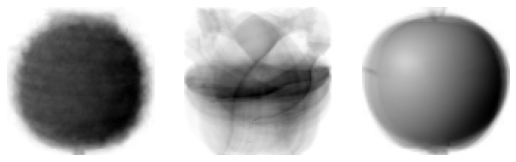

In [22]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [23]:
# 100번째 클러스터 중심 찾기
print(km.transform(fruits_2d[100:101]))

[[3374.06980304 8823.8971254  5252.22899617]]


In [24]:
# 100번째 예측 군집값
print(km.predict(fruits_2d[100:101]))

[0]


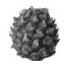

In [25]:
# 그림으로 확인하기
draw_fruits(fruits[100:101])

In [26]:
# km의 반복학습 횟수
km.n_iter_

4

> 기본 반복횟수는 300번이나 현재 4번안에 최적값을 찾았다는 의미

---
### 최적의 k찾기
- k-Means에서 ksms hyper parameter이므로 k값을 찾는 것이 중요하다.

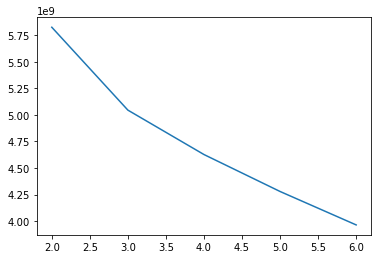

In [27]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.show()

> Elbow Method(최적의 군집 수 구하기)로 판단하면 클러스터가 3인 경우가 최적의 군집수이다.